Confusion Matrix:
[[798  16]
 [286 312]]

Accuracy: 0.7861189801699717
Precision: 0.9512195121951219
Recall: 0.5217391304347826
F1-Score: 0.673866090712743


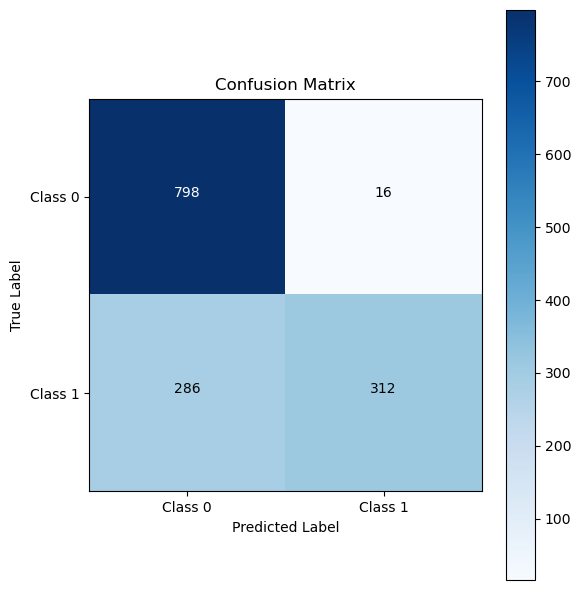

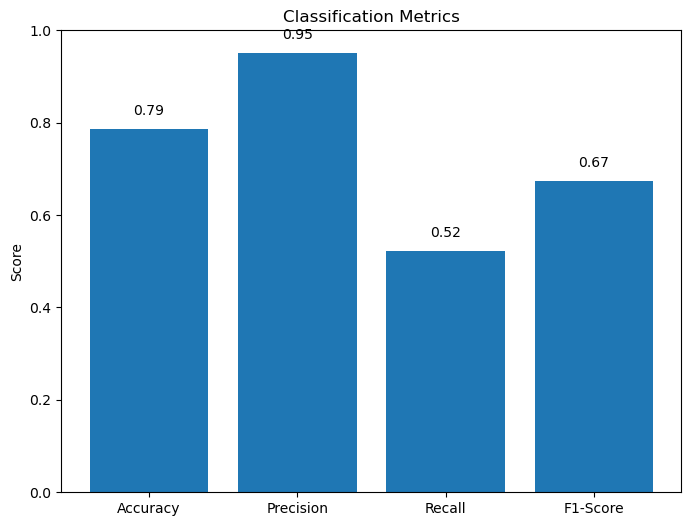

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the CSV file (make sure it's in the same directory or provide the full path)
df = pd.read_csv('classified_tweets.csv')

# Assuming the CSV contains the columns 'classification' (predictions) and 'true_label' (ground truth)
y_true = df['true_label']
y_pred = df['classification']

# Compute confusion matrix and other evaluation metrics
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# ---------------------------
# Plotting the Confusion Matrix
# ---------------------------
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks and labels
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])

# Annotate the grid with counts
thresh = conf_matrix.max() / 2.0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ---------------------------
# Plotting the Classification Metrics as a Bar Chart
# ---------------------------
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values())
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)

# Annotate each bar with its corresponding metric value
for idx, (metric, score) in enumerate(metrics.items()):
    plt.text(idx, score + 0.03, f"{score:.2f}", horizontalalignment='center')

plt.show()
